# BAGGED NEURAL NETWORKS

In [18]:
from __future__ import division
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
np.random.seed(20)
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
Xte = np.genfromtxt('data\X_test.txt', delimiter=None)

training_data_amount = 90000
Xtr = X[:training_data_amount]
Ytr = Y[:training_data_amount]
Xva = X[training_data_amount:]
Yva = Y[training_data_amount:]

In [19]:
class BaggedNN(ml.base.classifier):
    def __init__(self, learners):
        """Constructs a BaggedTree class with a set of learners. """
        self.learners = learners
    
    def predictSoft(self, X):
        """Predicts the probabilities with each bagged learner and average over the results. """
        n_bags = len(self.learners)
        preds = [self.learners[l].predictSoft(X) for l in range(n_bags)]
        return np.mean(preds, axis=0)
    
def get_2d_array_of_size(x, y):
    result = []
    for i in range(x):
        result.append([])
        for j in range(y):
            result[i].append(-1)
            
    return result

def toKaggle(filename,prSoft):
    fh=open(filename,'w')# open file for upload
    fh.write('ID,Target\n')# output header line
    for i,yi in enumerate(prSoft[:,1].ravel()):
        fh.write('{},{}\n'.format(i+1,yi))# output each predictionfh.close()# close the file

In [20]:
num_of_shuffles = 5
depth_recur = 8
stopIterAmount = 65

firstLayerNodeCount2 = get_2d_array_of_size(num_of_shuffles, depth_recur)
training_error_rates2 = get_2d_array_of_size(num_of_shuffles, depth_recur)
validation_error_rates2 = get_2d_array_of_size(num_of_shuffles, depth_recur)
training_aucs2 = get_2d_array_of_size(num_of_shuffles, depth_recur)
validation_aucs2 = get_2d_array_of_size(num_of_shuffles, depth_recur)
learners2 = get_2d_array_of_size(num_of_shuffles, depth_recur)

for shuffle_num in range(num_of_shuffles):
    print shuffle_num
    X,Y = ml.shuffleData(X,Y)
    Xtr, Ytr = ml.shuffleData(Xtr,Ytr)
    for i in range(2,2+depth_recur):
        firstLayerNodeCount2[shuffle_num][i-2] = 2**i
        nn = ml.nnet.nnetClassify()
        nn.init_weights([Xtr.shape[1], 2**i, len(np.unique(Ytr))], 'random', Xtr, Ytr)
        nn.train(Xtr, Ytr, stopTol=1e-4, stepsize=1.1, stopIter=stopIterAmount)
        learners2[shuffle_num][i-2] = nn
        training_error_rates2[shuffle_num][i-2] = nn.err(Xtr, Ytr)
        validation_error_rates2[shuffle_num][i-2] = nn.err(Xva, Yva)
        training_aucs2[shuffle_num][i-2] = nn.auc(Xtr, Ytr)
        validation_aucs2[shuffle_num][i-2] = nn.auc(Xva, Yva)
        print "For", str(2**i) + ":"
        print "\t training error  :", nn.err(Xtr, Ytr)
        print "\t training auc    :", nn.auc(Xtr, Ytr)
        print "\t validation error:", nn.err(Xva, Yva)
        print "\t validation auc  :", nn.auc(Xva, Yva)
        

        

0
it 1 : Jsur = 0.450228012094, J01 = 0.31
it 2 : Jsur = 0.429051621928, J01 = 0.31
it 4 : Jsur = 0.427730849403, J01 = 0.31
it 8 : Jsur = 0.425601891906, J01 = 0.31
it 16 : Jsur = 0.425309655049, J01 = 0.31
it 32 : Jsur = 0.423148444949, J01 = 0.31
For 4:
	 training error  : 0.31
	 training auc    : 0.5785413744740533
	 validation error: 0.3
	 validation auc  : 0.38095238095238093
it 1 : Jsur = 0.462173611355, J01 = 0.31
it 2 : Jsur = 0.452913278063, J01 = 0.31
it 4 : Jsur = 0.43727789238, J01 = 0.31
it 8 : Jsur = 0.422584374542, J01 = 0.31
For 8:
	 training error  : 0.31
	 training auc    : 0.5233754090696586
	 validation error: 0.3
	 validation auc  : 0.619047619047619
it 1 : Jsur = 0.507935725918, J01 = 0.31
it 2 : Jsur = 0.455649013005, J01 = 0.31
it 4 : Jsur = 0.44264864836, J01 = 0.31
it 8 : Jsur = 0.427451879145, J01 = 0.31
it 16 : Jsur = 0.420643456132, J01 = 0.31
it 32 : Jsur = 0.418525625854, J01 = 0.31
For 16:
	 training error  : 0.3
	 training auc    : 0.6040205703599814
	

it 64 : Jsur = 0.402238393272, J01 = 0.29
For 128:
	 training error  : 0.3
	 training auc    : 0.6753155680224403
	 validation error: 0.2
	 validation auc  : 0.42857142857142855
it 1 : Jsur = 1.37998192987, J01 = 0.69
it 2 : Jsur = 0.819230974632, J01 = 0.38
it 4 : Jsur = 0.705163557252, J01 = 0.29
it 8 : Jsur = 0.568370535791, J01 = 0.32
it 16 : Jsur = 0.434874057035, J01 = 0.29
it 32 : Jsur = 0.386205267693, J01 = 0.27
it 64 : Jsur = 0.381320286567, J01 = 0.27
For 256:
	 training error  : 0.27
	 training auc    : 0.6935483870967741
	 validation error: 0.2
	 validation auc  : 0.33333333333333337
it 1 : Jsur = 1.38, J01 = 0.69
it 2 : Jsur = 1.37999932225, J01 = 0.69
For 512:
	 training error  : 0.69
	 training auc    : 0.5
	 validation error: 0.7
	 validation auc  : 0.5
3
it 1 : Jsur = 0.464240610807, J01 = 0.31
it 2 : Jsur = 0.453504023437, J01 = 0.31
it 4 : Jsur = 0.436369158462, J01 = 0.31
it 8 : Jsur = 0.420252452425, J01 = 0.31
For 4:
	 training error  : 0.31
	 training auc    : 0

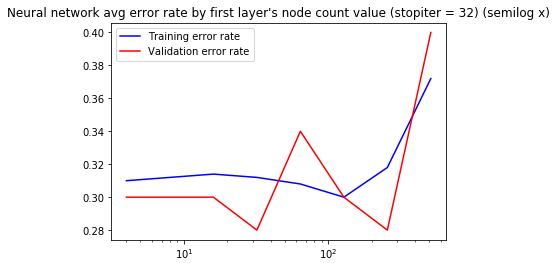

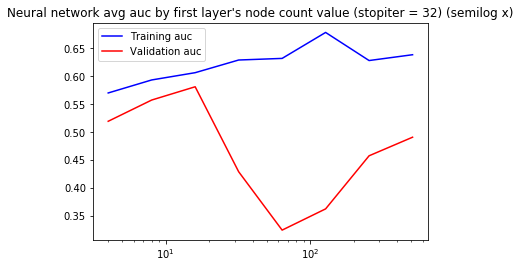

In [21]:
#Plot the training error rates and validation error rates as a function of the firstLayerNodeCount

def avg(arrays):
    avgs = []
    for cur_x in range(len(arrays[0])):
        acr = []
        for i in range(len(arrays)):
            acr.append(arrays[i][cur_x])
        avgs.append(sum(acr)/len(acr)) #take mean of acr and append
    return avgs

plt.figure(0)
plt.semilogx(avg(firstLayerNodeCount2), avg(training_error_rates2),'b-', label="Training error rate")
plt.semilogx(avg(firstLayerNodeCount2), avg(validation_error_rates2),'r-', label="Validation error rate")
plt.title("Neural network avg error rate by first layer's node count value (stopiter = 32) (semilog x)")
plt.legend()
plt.show()

#Plot the training auc's and validation auc's as a function of the firstLayerNodeCount
plt.figure(0)
plt.semilogx(avg(firstLayerNodeCount2), avg(training_aucs2),'b-', label="Training auc")
plt.semilogx(avg(firstLayerNodeCount2), avg(validation_aucs2),'r-', label="Validation auc")
plt.title("Neural network avg auc by first layer's node count value (stopiter = 32) (semilog x)")
plt.legend()
plt.show()

In [23]:
bag = []
for ar1 in learners2:
    for learner in ar1:
        print learner.auc(Xtr, Ytr)
        if (learner.auc(Xtr, Ytr) > .605):
            bag.append(learner)
            print "Added learner!"


bnn = BaggedNN(np.asarray(bag))
bnn.classes = np.unique(Y)

print("{0:>15}: {1:.4f}".format('Train AUC', bnn.auc(Xtr, Ytr)))
print("{0:>15}: {1:.4f}".format('Validation AUC', bnn.auc(X, Y)))


0.5785413744740533
0.5233754090696586
0.6040205703599814
0.5621785881252922
0.5140252454417953
0.6886395511921458
Added learner!
0.3889668069191211
0.47288452547919596
0.5275829827021973
0.6245909303412809
Added learner!
0.6605890603085554
Added learner!
0.6587190275829827
Added learner!
0.6991584852734923
Added learner!
0.7260402057035997
Added learner!
0.7087424029920524
Added learner!
0.7828424497428705
Added learner!
0.5088826554464703
0.509116409537167
0.6316035530621785
Added learner!
0.635343618513324
Added learner!
0.6507713884992988
Added learner!
0.6753155680224403
Added learner!
0.6935483870967741
Added learner!
0.5
0.5897615708274895
0.671575502571295
Added learner!
0.5497896213183731
0.6622253389434315
Added learner!
0.6360448807854138
Added learner!
0.6792893875642824
Added learner!
0.6086956521739131
Added learner!
0.660822814399252
Added learner!
0.6444600280504909
Added learner!
0.6372136512388967
Added learner!
0.5850864890135576
0.6262272089761571
Added learner!
0.65

In [6]:
Pv0 = bnn.predictSoft(Xva)
Pe0 = bnn.predictSoft(Xte)

toKaggle('Pv0.csv',Pv0)
toKaggle('Pe0.csv',Pe0)

# BAGGED DECISION TREES

In [7]:
class BaggedTree(ml.base.classifier):
    def __init__(self, learners):
        """Constructs a BaggedTree class with a set of learners. """
        self.learners = learners
    
    def predictSoft(self, X):
        """Predicts the probabilities with each bagged learner and average over the results. """
        n_bags = len(self.learners)
        preds = [self.learners[l].predictSoft(X) for l in range(n_bags)]
        return np.mean(preds, axis=0)

In [8]:
n_bags = 10
bags = []   # self.learners
for l in range(n_bags):
    # Each boosted data is the size of the original data. 
    Xi, Yi = ml.bootstrapData(Xtr, Ytr, Xtr.shape[0])

    # Train the model on that draw
    tree = ml.dtree.treeClassify(Xi, Yi, minParent=2**6,maxDepth=100, nFeatures=6)
    bags.append(tree)

In [9]:
bt = BaggedTree(bags)
bt.classes = np.unique(Y)

print("{0:>15}: {1:.4f}".format('Train AUC', bt.auc(Xtr, Ytr)))
print("{0:>15}: {1:.4f}".format('Validation AUC', bt.auc(Xva, Yva)))

      Train AUC: 0.7948
 Validation AUC: 0.8810


In [10]:
Pv1 = bt.predictSoft(Xva)
Pe1 = bt.predictSoft(Xte)

toKaggle('Pv1.csv',Pv1)
toKaggle('Pe1.csv',Pe1)

# GRADIENT BOOSTED DECISION TREES

In [11]:
class dummy(ml.classifier):
    def set(self, P):
        self.Pr = P
        self.classes = np.array([0, 1])
    def predictSoft(self, X):
        return self.Pr

In [12]:
def createAndKaggleBoostedTree(Xti, Xvi, Yti, Yvi, Xtest, depth, minLeaf, nFeatures, numBoosts):
    ens = dummy()
    
    mu = np.mean(Yti)
    YtrCopy = np.copy(Yti) - mu

    totalXtrBoost = np.zeros((Xti.shape[0], 2)) + mu
    totalXvaBoost = np.zeros((Xvi.shape[0], 2)) + mu
    totalTestBoost = np.zeros((Xtest.shape[0], 2)) + mu
    
    alpha = 1.0
    
    for i in range(numBoosts):
        learner = ml.dtree.treeRegress()
        learner.train(Xti, YtrCopy, maxDepth=depth, minLeaf=minLeaf, nFeatures = nFeatures)
#         learner = ml.knn.knnRegress()
#         learner.train(XtrTest, YtrCopy, K=1)
#         learner = ml.linearC.linearClassify(Xti, YtrCopy, reg=1e-3, initStep=.1, stopIter=1000)
        
        YtrCopy -= learner.predict(Xti)
        totalXtrBoost[:,1] += learner.predict(Xti)
        totalXvaBoost[:,1] += learner.predict(Xvi)
        totalTestBoost[:,1] += learner.predict(Xtest)
        
        ens.set(totalXvaBoost /(i+1.))
        print('Tree Boost Num {}/{} AUC: {}'.format(i, numBoosts, ens.auc(Xvi, Yvi)))

    ens.set(totalXtrBoost)
    print('Training Error:', ens.auc(Xti, Yti))
    ens.set(totalXvaBoost)
    print('Validation Error:', ens.auc(Xvi, Yvi))
    
    toKaggle('Pv2.csv', totalXvaBoost)
    toKaggle('Pe2.csv', totalTestBoost)
    #return (ens.auc(Xti, Yti), ens.auc(Xvi, Yvi))

In [13]:
createAndKaggleBoostedTree(Xtr, Xva, Ytr, Yva, Xte, depth=11, minLeaf=70, nFeatures=8, numBoosts=18)

Tree Boost Num 0/18 AUC: 0.5
Tree Boost Num 1/18 AUC: 0.5
Tree Boost Num 2/18 AUC: 0.5
Tree Boost Num 3/18 AUC: 0.5
Tree Boost Num 4/18 AUC: 0.5
Tree Boost Num 5/18 AUC: 0.5
Tree Boost Num 6/18 AUC: 0.5
Tree Boost Num 7/18 AUC: 0.5
Tree Boost Num 8/18 AUC: 0.5
Tree Boost Num 9/18 AUC: 0.5
Tree Boost Num 10/18 AUC: 0.5
Tree Boost Num 11/18 AUC: 0.5
Tree Boost Num 12/18 AUC: 0.5
Tree Boost Num 13/18 AUC: 0.5
Tree Boost Num 14/18 AUC: 0.5
Tree Boost Num 15/18 AUC: 0.5
Tree Boost Num 16/18 AUC: 0.5
Tree Boost Num 17/18 AUC: 0.5
('Training Error:', 0.5)
('Validation Error:', 0.5)


In [14]:
Pv0=np.genfromtxt('Pv0.csv',delimiter=',',skip_header=1)[:,1:2]
Pv1=np.genfromtxt('Pv1.csv',delimiter=',',skip_header=1)[:,1:2]
Pv2=np.genfromtxt('Pv2.csv',delimiter=',',skip_header=1)[:,1:2]

Pe0=np.genfromtxt('Pe0.csv',delimiter=',',skip_header=1)[:,1:2]
Pe1=np.genfromtxt('Pe1.csv',delimiter=',',skip_header=1)[:,1:2]
Pe2=np.genfromtxt('Pe2.csv',delimiter=',',skip_header=1)[:,1:2]



In [15]:
# Create a matrix of all predictions for each validation data point, e.g.:
print np.hstack((Pv0,Pv1)).shape

(10L, 2L)


In [16]:
Sv=np.hstack((Pv0,Pv1,Pv2))
stack=ml.linearC.linearClassify(Sv,Yva,reg=1e-3)

print"** Stacked AUC: ",stack.auc(Sv,Yva)
Se=np.hstack((Pe0,Pe1,Pe2))
PeS=stack.predictSoft(Se)
toKaggle('PStack.csv',PeS)

** Stacked AUC:  0.8095238095238095


In [17]:
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
Yte = np.vstack((np.arange(Xte.shape[0]), bnn.predictSoft(Xte)[:,1])).T
# Output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='ID,Prob1',comments='',delimiter=',')